### Importing relevant libraries

In [1]:
import nltk
from nltk import tokenize
from nltk.corpus import PlaintextCorpusReader, stopwords
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import random
from collections import  Counter, defaultdict

C:\Users\dianfarahr.2019\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\dianfarahr.2019\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading Legal txt Documents

In [9]:
file_directory = r"../data/full_contract_txt"
filename_pattern = '.+\.txt'
contracts = PlaintextCorpusReader(file_directory, filename_pattern)

contracts.fileids()

['2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-BrandingAgreement_AgencyAgreement.txt',
 'ABILITYINC_06_15_2020-EX-4.25-SERVICESAGREEMENT.txt',
 'ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-EX-10.13-JOINTVENTUREAGREEMENT.txt',
 'ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTORAGREEMENT.txt',
 'ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENTAGREEMENT.txt',
 'ADAPTIMMUNETHERAPEUTICSPLC_04_06_2017-EX-10.11-STRATEGICALLIANCEAGREEMENT.txt',
 'ADIANUTRITION,INC_04_01_2005-EX-10.D2-RESELLERAGREEMENT.txt',
 'ADMABioManufacturing,LLC-Amendment#3toManufacturingAgreement.txt',
 'ADUROBIOTECH,INC_06_02_2020-EX-10.7-CONSULTINGAGREEMENT(1).txt',
 'ADUROBIOTECH,INC_06_02_2020-EX-10.7-CONSULTINGAGREEMENT.txt',
 'AFSALABANCORPINC_08_01_1996-EX-1.1-AGENCYAGREEMENT.txt',
 'AIRSPANNETWORKSINC_04_11_2000-EX-10.5-DistributorAgreement.txt',
 'AIRTECHINTERNATIONALGROUPINC_05_08_2000-EX-10.4-FRANCHISEAGREEMENT.txt',
 'ALAMOGORDOFINANCIALCORP_12_16_1999-EX-1-AGENCYAGREEMENT.txt',
 'ALCOSTORESINC_12_14_20

In [10]:
len(contracts.fileids())

507

### Converting Text Files to CSV

In [66]:
contracts_df = pd.DataFrame()

In [67]:
contracts_df['contract'] = contracts.fileids()

In [68]:
contracts_df['text'] = ''

In [69]:
texts = []
for contract in contracts.fileids():
    contractObject = open("data/full_contract_txt/"+contract, "rt", encoding="utf8")
    strings = re.findall(r"\S+", contractObject.read())
    texts.append(' '.join(strings))

In [70]:
contracts_df['text'] = texts

In [5]:
#contracts_df.to_csv('contracts.csv', index=False)

### Loading CSV file

In [6]:
contracts_df = pd.read_csv('../data/contracts.csv')

In [7]:
contracts_df['text'] = contracts_df['text'].apply(lambda x: x.lower())

In [8]:
contracts_df.head()

,contract,text
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,co-branding and advertising agreement this co-...
1,ABILITYINC_06_15_2020-EX-4.25-SERVICESAGREEMEN...,exhibit 4.25 information in this exhibit ident...
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,exhibit 10.13 joint venture agreement collecti...
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTORAGRE...,exhibit 10.31 pursuant to 17 c.f.r. § 240.24b-...
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENTAG...,redacted copy confidential treatment requested...


### Data Exploration

* Number of sentences
* Number of words
* Number of characters
* Number of stopwords
* Number of numerics
* Average word length
* Sentence density

#### Number of sentences

In [13]:
contracts_df['sentence_count'] = contracts_df['text'].apply(lambda x: len(tokenize.sent_tokenize(x)))

In [14]:
contracts_df[['text', 'sentence_count']].head()

,text,sentence_count
0,co-branding and advertising agreement this co-...,177
1,exhibit 4.25 information in this exhibit ident...,121
2,exhibit 10.13 joint venture agreement collecti...,50
3,exhibit 10.31 pursuant to 17 c.f.r. § 240.24b-...,477
4,redacted copy confidential treatment requested...,103


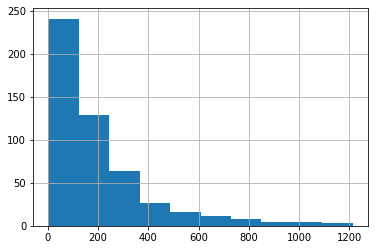

In [15]:
contracts_df['sentence_count'].hist()

#### Number of words

In [16]:
contracts_df['word_count'] = contracts_df['text'].apply(lambda x: len(str(x).split(" ")))

In [17]:
contracts_df[['text', 'word_count']].head()

,text,word_count
0,co-branding and advertising agreement this co-...,4467
1,exhibit 4.25 information in this exhibit ident...,4115
2,exhibit 10.13 joint venture agreement collecti...,1911
3,exhibit 10.31 pursuant to 17 c.f.r. § 240.24b-...,13349
4,redacted copy confidential treatment requested...,3770


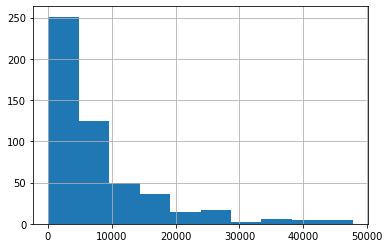

In [18]:
contracts_df['word_count'].hist()

#### Number of characters

In [19]:
contracts_df['char_count'] = contracts_df['text'].str.len()

In [20]:
contracts_df[['text','char_count']].head()

,text,char_count
0,co-branding and advertising agreement this co-...,28764
1,exhibit 4.25 information in this exhibit ident...,26287
2,exhibit 10.13 joint venture agreement collecti...,11917
3,exhibit 10.31 pursuant to 17 c.f.r. § 240.24b-...,86746
4,redacted copy confidential treatment requested...,24203


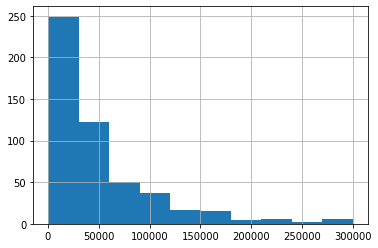

In [21]:
contracts_df['char_count'].hist()

#### Stopwords

In [22]:
# number of stopwords
stop = stopwords.words('english')
contracts_df['stopwords'] = contracts_df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [23]:
contracts_df[['text','stopwords']].head()

,text,stopwords
0,co-branding and advertising agreement this co-...,1753
1,exhibit 4.25 information in this exhibit ident...,1767
2,exhibit 10.13 joint venture agreement collecti...,840
3,exhibit 10.31 pursuant to 17 c.f.r. § 240.24b-...,5225
4,redacted copy confidential treatment requested...,1407


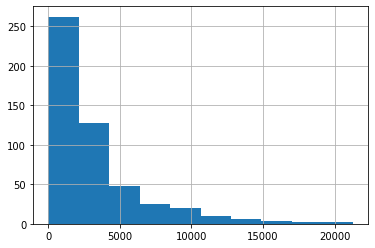

In [24]:
contracts_df['stopwords'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225F77CF5F8>,
      dtype=object)

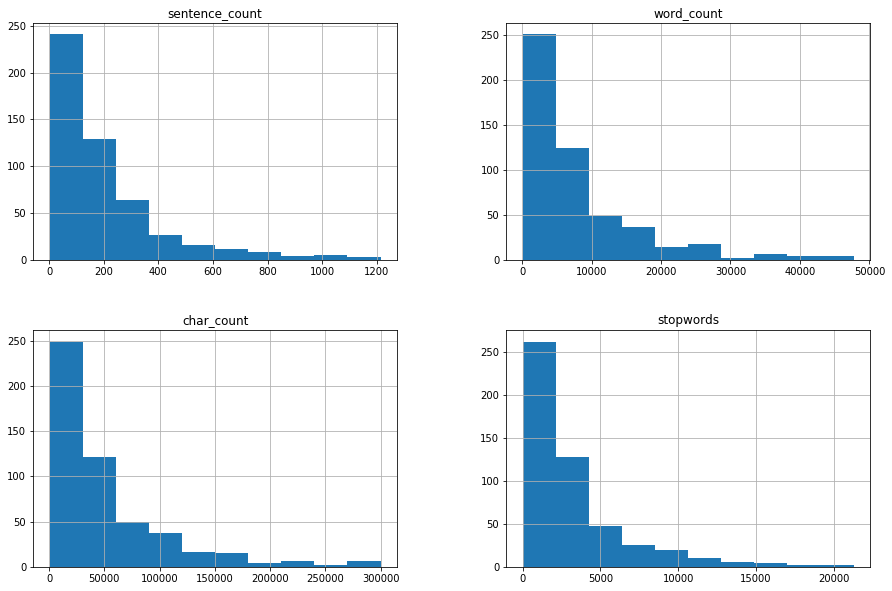

In [30]:
contracts_df[['sentence_count', 'word_count', 'char_count', 'stopwords']].hist(figsize=(15,10))

<BarContainer object of 10 artists>

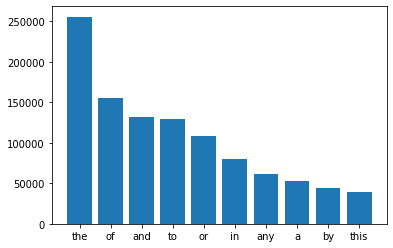

In [85]:
#top stopwords used in all documents
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

#### Common Words

In [86]:
#create corpus
corpus=[]
new= contracts_df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

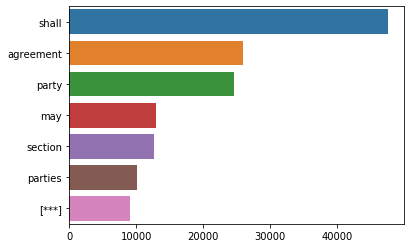

In [87]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [88]:
#clean out punctuation and special characters
contracts_df['text'] = contracts_df['text'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

In [89]:
#create new corpus without special characters or punctuation
corpus=[]
new= contracts_df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

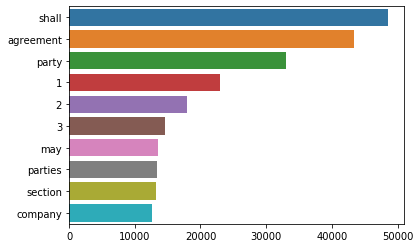

In [90]:
# most common words
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

#### Number of numerics

In [91]:
contracts_df['numerics'] = contracts_df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [92]:
contracts_df[['text','numerics']].head()

,text,numerics
0,co branding and advertising agreement this co ...,188
1,exhibit 4 25 information in this exhibit ident...,136
2,exhibit 10 13 joint venture agreement collecti...,45
3,exhibit 10 31 pursuant to 17 c f r 240 24b ...,749
4,redacted copy confidential treatment requested...,103


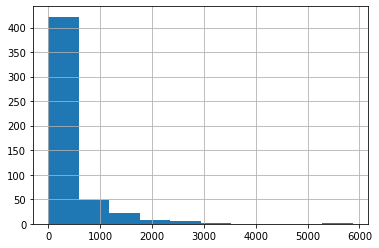

In [93]:
contracts_df['numerics'].hist()

#### Word Density

In [94]:
contracts_df['avg_word'] = contracts_df['word_count'] / (contracts_df['char_count'] + 1)

In [95]:
contracts_df[['text','avg_word']].head()

,text,avg_word
0,co branding and advertising agreement this co ...,0.155293
1,exhibit 4 25 information in this exhibit ident...,0.156535
2,exhibit 10 13 joint venture agreement collecti...,0.160346
3,exhibit 10 31 pursuant to 17 c f r 240 24b ...,0.153884
4,redacted copy confidential treatment requested...,0.155759


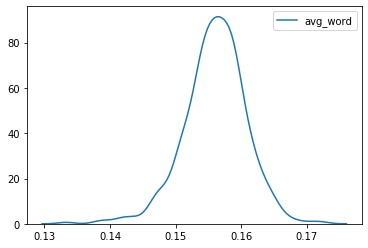

In [102]:
sns.kdeplot(contracts_df['avg_word'])

#### Sentence density

In [96]:
contracts_df['sentence_density'] = contracts_df['sentence_count'] / (contracts_df['word_count'] + 1)

In [97]:
contracts_df[['text','sentence_density']].head()

,text,sentence_density
0,co branding and advertising agreement this co ...,0.039615
1,exhibit 4 25 information in this exhibit ident...,0.029397
2,exhibit 10 13 joint venture agreement collecti...,0.026151
3,exhibit 10 31 pursuant to 17 c f r 240 24b ...,0.035730
4,redacted copy confidential treatment requested...,0.027314


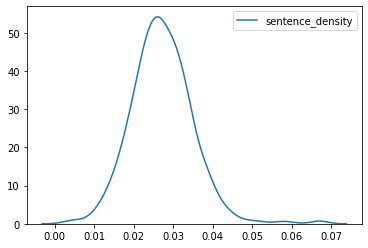

In [101]:
sns.kdeplot(contracts_df['sentence_density'])

### Analysis of overall feature attributes

In [31]:
contracts_df[['sentence_count', 'word_count', 'char_count', 'stopwords']].describe()

,sentence_count,word_count,char_count,stopwords
count,507.000000,507.000000,507.000000,507.000000
mean,201.938856,7854.100592,50390.437870,3146.504931
std,210.037476,8377.097147,53795.555428,3368.527018
min,2.000000,109.000000,645.000000,7.000000
25%,66.500000,2462.000000,16070.000000,963.500000
50%,130.000000,4973.000000,31983.000000,2028.000000
75%,255.500000,10181.500000,65126.000000,4095.000000
max,1214.000000,47733.000000,299808.000000,21274.000000
